<a href="https://colab.research.google.com/github/bonyuta0204/gis-exploration/blob/main/Introduction_to_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd


In [2]:
!wget https://github.com/AutoGIS/data/raw/master/L2_data.zip
!unzip L2_data.zip
!ls L2_data

--2024-09-16 06:28:49--  https://github.com/AutoGIS/data/raw/master/L2_data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip [following]
--2024-09-16 06:28:50--  https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12116862 (12M) [application/zip]
Saving to: ‘L2_data.zip’

L2_data.zip         100%[===================>]  11.55M  57.4MB/s    in 0.2s    

2024-09-16 06:28:50 (57.4 MB/s) - ‘L2_data.zip’ saved [12116862/12116862]

Archive:  L2_data.zip
   creating: L2_data/
 extracting: L2_data/Europe_bord

In [3]:
import os

# Define path to folder
input_folder = r"L2_data/NLS/2018/L4/L41/L4132R.shp"

# Join folder path and filename
fp = os.path.join(input_folder, "m_L4132R_p.shp")

# Print out the full file path
print(fp)

L2_data/NLS/2018/L4/L41/L4132R.shp/m_L4132R_p.shp


In [4]:
import geopandas as gpd

# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [7]:
# rename columns from FINNISH to ENGLISH
data = data[['RYHMA', 'LUOKKA',  'geometry']]
colnames = {'RYHMA':'GROUP', 'LUOKKA':'CLASS'}
data.rename(columns=colnames, inplace=True)

data.head()


<ipython-input-7-c9c778b74b2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=colnames, inplace=True)


,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


<Axes: >

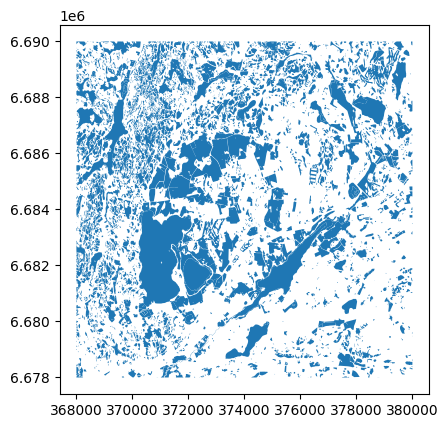

In [8]:
data.plot()

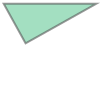

In [10]:
data.at[0, "geometry"]


In [11]:
# Iterate over rows and print the area of a Polygon
for index, row in data[0:5].iterrows():

    # Get the area from the shapely-object stored in the geometry-column
    poly_area = row['geometry'].area

    # Print info
    print("Polygon area at index {index} is: {area:.0f} square meters".format(index=index, area=poly_area))


Polygon area at index 0 is: 76 square meters
Polygon area at index 1 is: 2652 square meters
Polygon area at index 2 is: 3186 square meters
Polygon area at index 3 is: 13075 square meters
Polygon area at index 4 is: 3981 square meters


In [13]:
# Create a new column called 'area'
data['area'] = data.area

In [14]:
data['area']

,area
0,76.027392
1,2652.054186
2,3185.649995
3,13075.165279
4,3980.682621
...,...
4306,2651.800270
4307,376.503380
4308,413.942555
4309,3487.927677


In [15]:
# Select a class
selection = data.loc[data["CLASS"]==36200]

<Axes: >

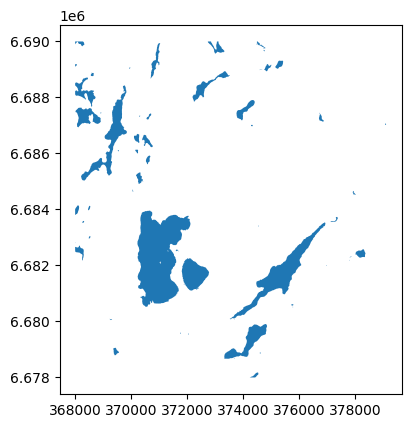

In [16]:
selection.plot()